**ML Days Study Jams #2 - Data Visualization
**

İki tip verimiz vardır, 

**Numerik** ve **Kategorik**

Kategorik verilere örnek olarak;
* Kadın/Erkek
* Sıcak/Soğuk
Nicel olarak ölçülemeyen, nitel olarak düşünebilirsiniz.

Eğer siz kategorik veri tahmini yapıyorsanız,
örn : Kedi/Köpek fotoğrafı
burada **sınıflandırma** problemi çözüyorsunuz.

Eğer insan fotoğrafları var ve yaşlarını tahmin etmek istiyorsanız, 
burada **regresyon** problemi çözüyorsunuz.
****

![](https://miro.medium.com/max/775/1*Qn4eJPhkvrEQ62CtmydLZw.png)

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/pima-indians-diabetes-database/diabetes.csv


Amerikan yerlisi kadınların sağlık değerlerini ve diyabet olup olmadıklarını gösteren veri setimizi inceleyeceğiz.
**pima-indians-diabetes-database**
Eğer yaş tahmini yapacaksak **regression** problemi çözüyoruz fakat diyabet/diyabet değil olarak sınıflandıracaksak adı üstünde **sınıflandırma** problemi çözüyor olacağız.


In [5]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv") #csv dosyamızı yükledik.

In [7]:
df.head() #özelliklerimizin başlıklarına bakıyoruz.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.describe()#veri çervemizdeki özelliklerimizi gösteriyoruz.
#Insulin değeri 0 olamaz. Aykırı veri(Outlayer)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
df.isna().any() #df.isna() kayıp veri olup olmadığına bakıyor biz buna .any() eklersek, bitane bile kayıp veri varsa burası True olacaktır.

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
Overweight                  False
dtype: bool

In [36]:
df.notna().any() #df.isna().any() tam tersi

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
Overweight                  True
dtype: bool

In [38]:
df.isna().all() #tamamı na olan kolonları getirecektir.

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
Overweight                  False
dtype: bool

In [41]:
df.notna().all()

Pregnancies                 True
Glucose                     True
BloodPressure               True
SkinThickness               True
Insulin                     True
BMI                         True
DiabetesPedigreeFunction    True
Age                         True
Outcome                     True
Overweight                  True
dtype: bool

In [11]:
df.isna().sum() #her kolon için kaçtane örneğin na(kayıp) olduğunu ekrana basar.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
df.notna().sum() #her kolon için kayıp olmayan verileri ekrana basar

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
Overweight                  768
dtype: int64

In [26]:
df["Overweight"] = [1 if x > 25 else 0 for x in df.BMI] #Yeni bir öznitelik oluşturduk, Bir insanın beden kitle indeksi > 25 in üzerindeyse kiloludur '1' değilse '0'
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Overweight
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,0
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,1


## Relational Plots with Matplotlib

* Scatter plot: iki değişken arasındaki ilişkinin dağılımını veri noktalarıyla gösterir.
* Lineplot: İki değişken arasındaki ilişkiyi sürekli(continuous) gösterir. Veri noktaları birbirine çizgilerle bağlıdır. (Zaman serilerinde kullanılır) 

* s parametresi: marker boyutu
* c parametresi: marker rengi, hangi değişkeni tuttuğu da yazılabilir
* alpha: marker opaklığı

In [46]:
plt.rcParams.update({'font.size': 25}) #yazıların büyüklüğünü ayarlama(font.size), dictionary(sözlük) olarak verilecek.

In [47]:
sns.set_context("paper")

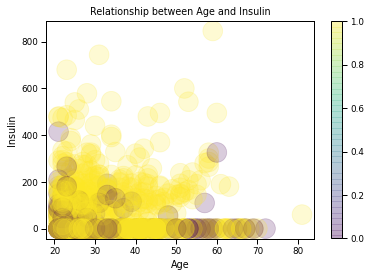

In [15]:
#Insulin ve yaş arasındaki ilişkiye bakıyoruz.
plt.scatter(df.Age, df.Insulin, c=df.Overweight, s=389, 
            alpha=0.2, cmap="viridis") #cmap renk paleti
plt.colorbar(); #hangi rengin hangi değere denk geldiğini gösteren yandaki ölçek
plt.xlabel("Age") #eksen ismi
plt.ylabel("Insulin") 
plt.title("Relationship between Age and Insulin") #plot ismi
plt.show()

![scatter](http://chartio.com/assets/5689fd/tutorials/charts/scatter-plots/a9b8dd5dc2057a70446e5aa32f32b49d54b55f5cabf17a4610e2da94bea7fed5/scatter-plot-example-2.png)

## Scatter plot with Subplots
fig, ax = plt.subplots(): figure ve axes object oluşturur. figure’de her şey var, axes data’yı tutuyor.

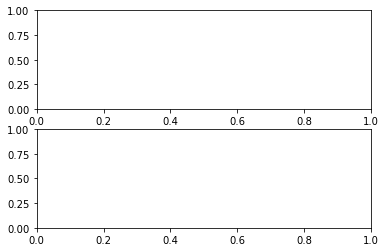

In [6]:
fig, ax = plt.subplots(2,1) #2 satır ve 1 sütunu olan 2 tane subplot
plt.show()

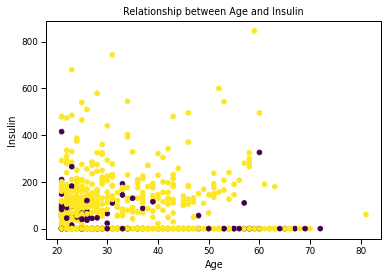

In [19]:
fig, ax = plt.subplots()
ax.scatter(df.Age, df.Insulin, c=df.Overweight, cmap="viridis")
ax.set_xlabel("Age")
ax.set_ylabel("Insulin")
ax.set_title("Relationship between Age and Insulin")
plt.show()

Histogram: Numerik ya da kategorik verilerde dağılımı yorumlamamıza yardımcı olur.

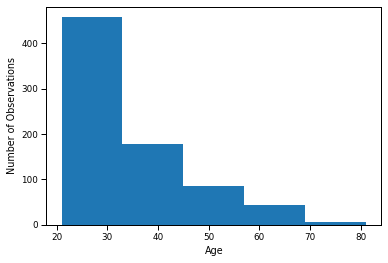

In [20]:
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age", bins=5)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Observations")
plt.show()

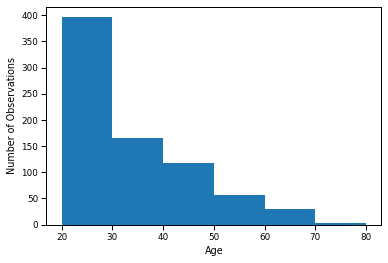

In [21]:
bins=[20, 30, 40, 50, 60, 70, 80]
fig, ax = plt.subplots()
ax.hist(df.Age, label="Age Bins", bins=bins)
ax.set_xlabel("Age")
ax.set_ylabel("Number of Observations")
plt.show()

Bar plot: Kategorik verinin özelliklerine bakmamızı sağlar. 

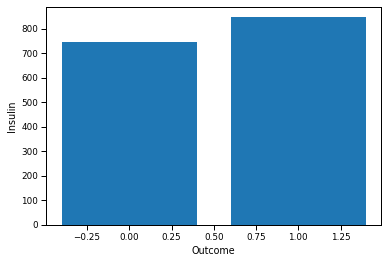

In [22]:
fig, ax = plt.subplots()
ax.bar(df.Outcome, df.Insulin)
ax.set_xlabel("Outcome")
ax.set_ylabel("Insulin")
plt.show()

## Kaydetme

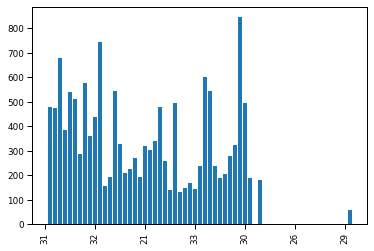

In [24]:
fig, ax = plt.subplots()
ax.bar(df.Age, df.Insulin)
ax.set_xticklabels(df.Age, rotation=90)
fig.savefig("Age.png")

* fig.savefig(“Age.png”): kayıp olmadan kaydeder, yüksek kalitelidir ama çok hafıza tutar
* fig.savefig(“Age.jpg”, quality=50): websitesine konulabilir
* fig.savefig(“Age.png”, dpi=200): dots per inch, dense rendering
* fig.set_size_inches([5,3]): aspect ratio

## Seaborn

* FacetGrid (relplot(), catplot()) subplotlar oluşturabilir
* AxesSubplot(scatterplot, countplot) bir tane plot oluşturur

## Count Plot

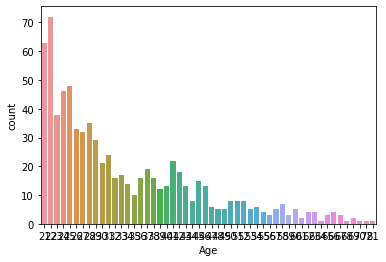

In [6]:
### sns.set_palette("RdBu") #renk paleti
#countplot veri noktalarını sayar.
sns.countplot(x="Age", data=df)
plt.show()

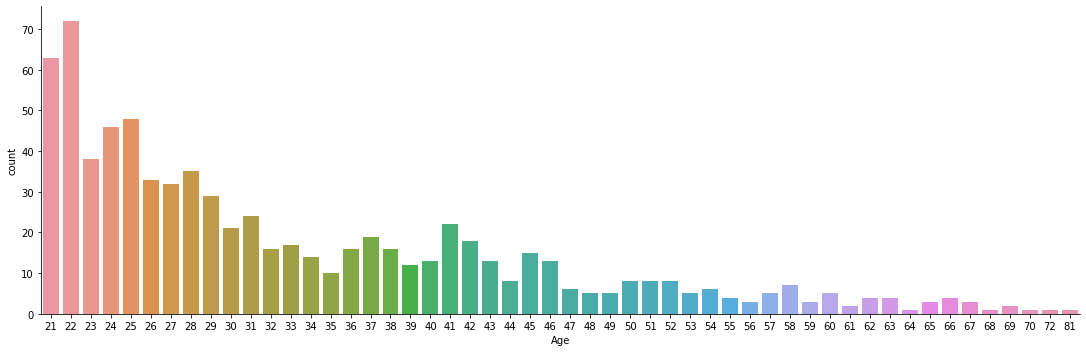

In [12]:
#catplot = categorical plot
#kind = "box", #"bar", "count"
sns.catplot(x="Age", aspect=3, data=df, kind="count")
plt.show()

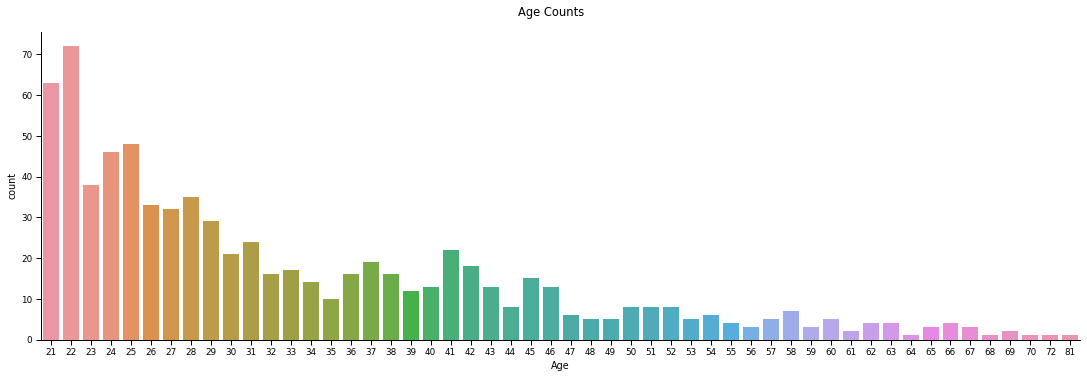

In [27]:
g = sns.catplot(x="Age", aspect=3, data=df, kind="count")
g.fig.suptitle("Age Counts", y=1.04) #ismi yukarı çıkarıyor
plt.show()

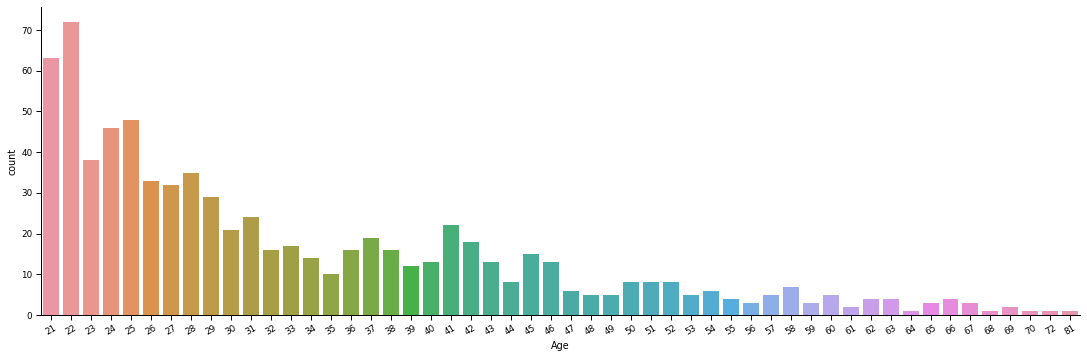

In [28]:
g = sns.catplot(x="Age", aspect=3, data=df, kind="count")
plt.xticks(rotation=30)
plt.show()

## Scatter plot

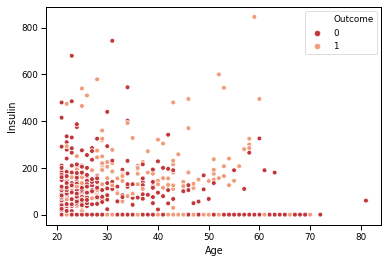

In [29]:
sns.scatterplot(x="Age", y="Insulin",data=df, hue="Outcome")
plt.show()

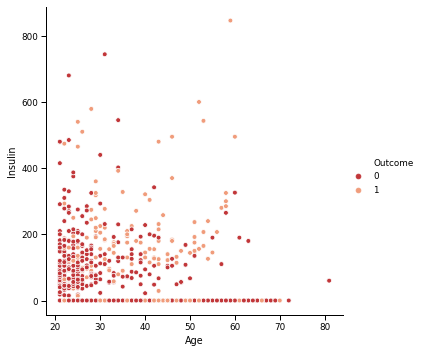

In [30]:
sns.relplot(x="Age", y="Insulin",data=df, hue="Outcome", 
            kind="scatter")
plt.show()

## Line plot

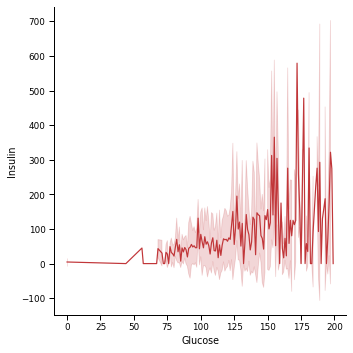

In [31]:
sns.relplot(x="Glucose", y="Insulin", data=df, kind="line", ci="sd", markers=True, dashes=False)
plt.show()

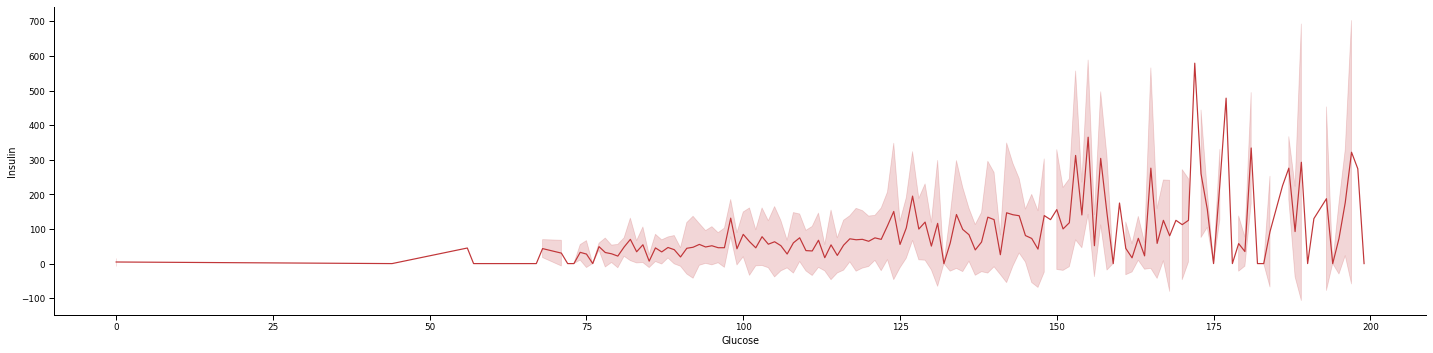

In [32]:
sns.relplot(x="Glucose", y="Insulin", data=df, kind="line", aspect=4, ci="sd")
plt.show()

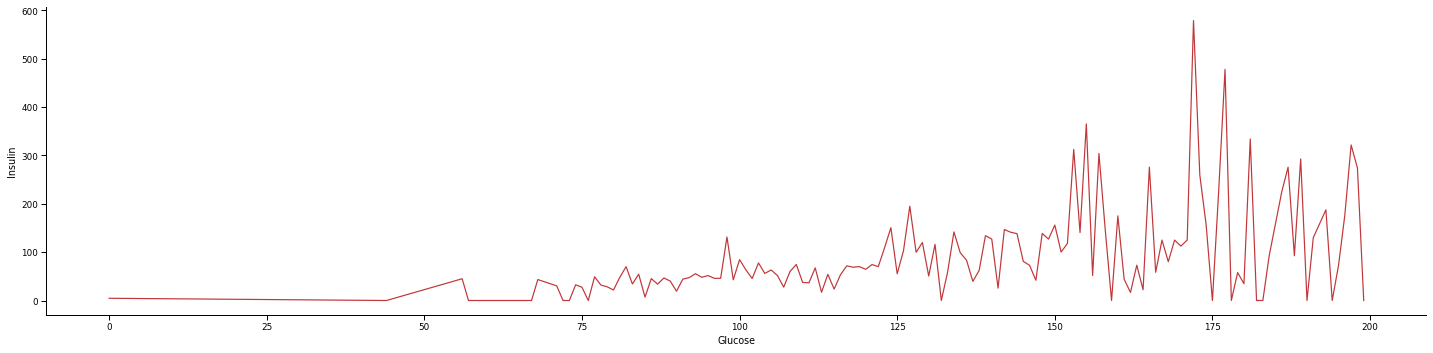

In [34]:
sns.relplot(x="Glucose", y="Insulin", data=df, kind="line", aspect=4, ci=None)
plt.show()

## Scatter Subplots

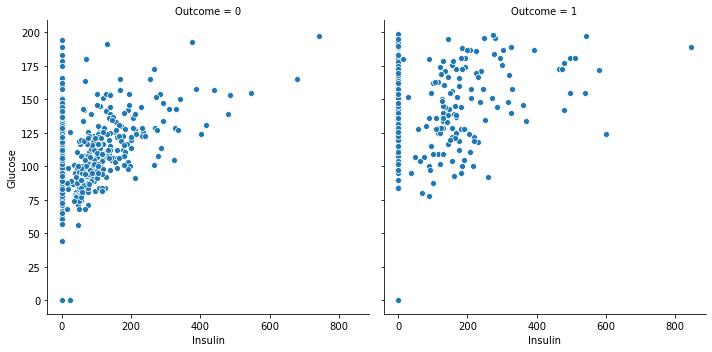

In [20]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", col="Outcome")
plt.show()

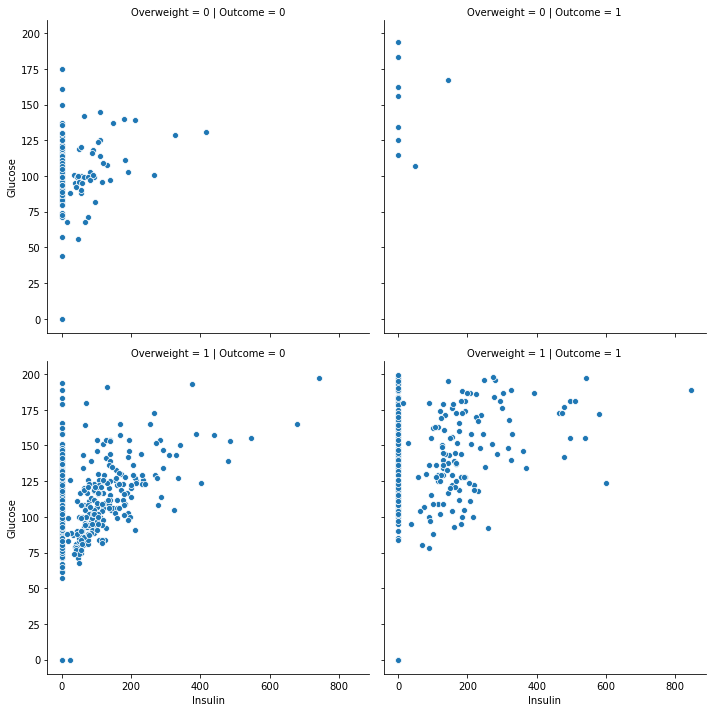

In [27]:
sns.relplot(x="Insulin", y="Glucose", data=df, kind="scatter", col="Outcome", row="Overweight")
plt.show()

## Heatmap

In [1]:
sns.set_palette("RdBu")
correlation=df.corr()
sns.heatmap(correlation, annot=True)
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-5a577bc6d8d1>, line 4)

## Categorical Plots

In [ ]:
sns.catplot(x="Outcome",y="Insulin",data=df, kind="bar")
plt.show()

![boxplot](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)

In [ ]:
sns.catplot(x="Outcome",y="Insulin",data=df, kind="box")
plt.show()

In [ ]:
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()

## Presets

In [ ]:
sns.set_style("dark")
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()
## white, dark, whitegrid, darkgrid, ticks

In [ ]:
sns.set_palette("PRGn")
sns.catplot(x="Outcome",data=df, kind="count")
plt.show()
# categorical plotlarda “RdBu”, “PRGn”,”RdBu_r”,”PRGn_r”
# continuous plotlarda Greys, Blues, PuRd, GnBu

In [ ]:
#sns.set_context("paper")
#plt.show()
# paper,poster, talk